# **1. Generar una red neuronal (sin librerias) que utilice el dataset iris con producto punto, errores y de dos capas.**

Diseño de la red neuronal
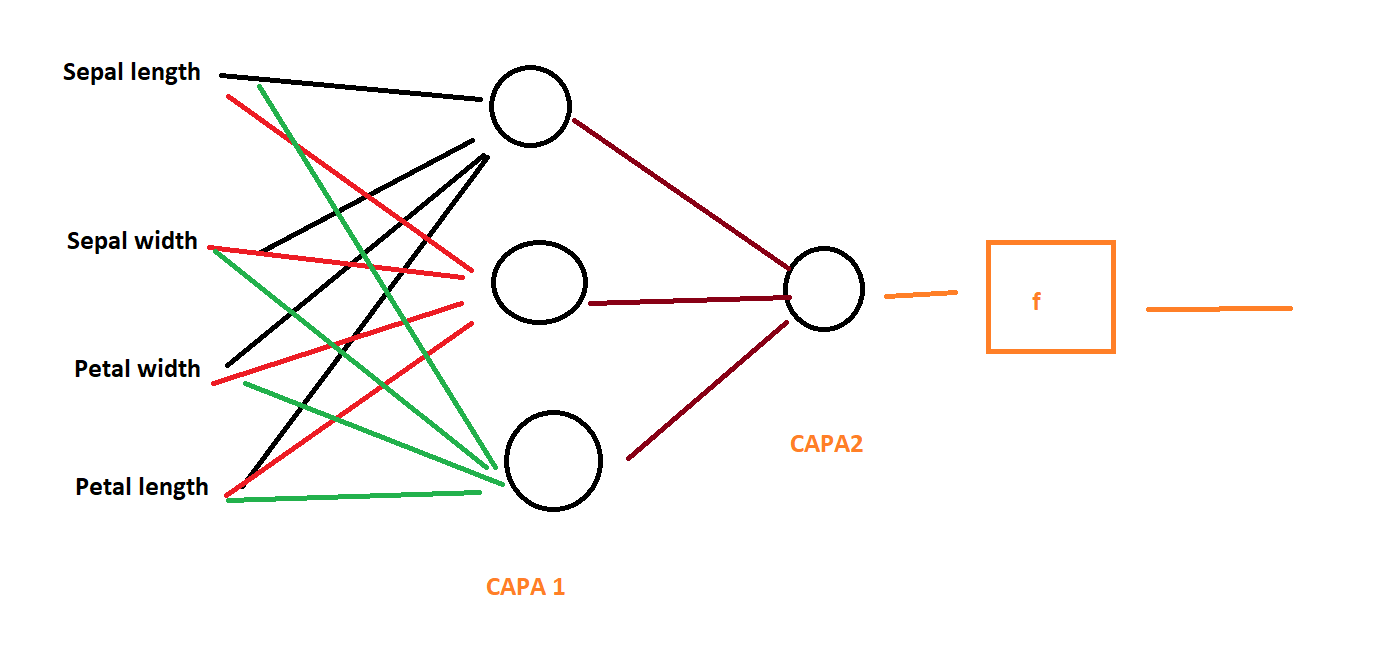

Tomando como base el algoritmo de la neurona visto en clases

Importamos nuestro dataset Iris desde google drive

In [1]:
import csv
import math
import random

# Nombre del archivo CSV
nombre_archivo = "./drive/MyDrive/data/iris.csv"

# Inicializar una lista para almacenar los datos
datos = []

# Abrir el archivo CSV y leer sus contenidos
with open(nombre_archivo, 'r', newline='') as archivo_csv:
    lector_csv = csv.reader(archivo_csv)

    # Leer cada fila del archivo CSV y agregarla a la lista de datos
    for fila in lector_csv:
        datos.append(fila)
for i in range(10):
  print(datos[i])

['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
['1', '5.1', '3.5', '1.4', '0.2', 'Iris-setosa']
['2', '4.9', '3.0', '1.4', '0.2', 'Iris-setosa']
['3', '4.7', '3.2', '1.3', '0.2', 'Iris-setosa']
['4', '4.6', '3.1', '1.5', '0.2', 'Iris-setosa']
['5', '5.0', '3.6', '1.4', '0.2', 'Iris-setosa']
['6', '5.4', '3.9', '1.7', '0.4', 'Iris-setosa']
['7', '4.6', '3.4', '1.4', '0.3', 'Iris-setosa']
['8', '5.0', '3.4', '1.5', '0.2', 'Iris-setosa']
['9', '4.4', '2.9', '1.4', '0.2', 'Iris-setosa']


Dividimos X y Y

In [2]:
# Separar las características (X) de las etiquetas (y)
#convertimos a float las columnas de la 1 a la 4 de todas las filas menos la primera
X = [list(map(float, fila[1:5])) for fila in datos[1:]]
y = [fila[5] for fila in datos[1:]]  # Se asume que las etiquetas están en la sexta columna

# Mostrar las primeras 10 filas de X e y
print("Características (X):")
for i in range(10):
    print(X[i])

print("\nEtiquetas (y):")
for i in range(10):
    print(y[i])

Características (X):
[5.1, 3.5, 1.4, 0.2]
[4.9, 3.0, 1.4, 0.2]
[4.7, 3.2, 1.3, 0.2]
[4.6, 3.1, 1.5, 0.2]
[5.0, 3.6, 1.4, 0.2]
[5.4, 3.9, 1.7, 0.4]
[4.6, 3.4, 1.4, 0.3]
[5.0, 3.4, 1.5, 0.2]
[4.4, 2.9, 1.4, 0.2]
[4.9, 3.1, 1.5, 0.1]

Etiquetas (y):
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa


Normalizar

In [3]:
# Calcular medias y desviaciones estándar para estandarizar X sin Librerias
num_filas = len(X)
num_columnas = len(X[0])
#hallamos las medias de cada columna
medias = []  # Inicializar una lista vacía para almacenar las medias de cada columna

# Iteramos  sobre cada columna
for i in range(num_columnas):
    suma_columna = 0  # Inicializar la suma para la columna actual

    # Iterar sobre cada fila en la columna actual
    for j in range(num_filas):
        suma_columna += X[j][i]  # Sumar el elemento en la posición (j, i)

    # Calcular la media y agregarla a la lista
    media_columna = suma_columna / num_filas
    medias.append(media_columna)

#desviacion estandar lo mismo que ariba pero con notación comprimida
desviaciones_estandar = [math.sqrt(sum((X[j][i] - medias[i]) ** 2 for j in range(num_filas)) / num_filas) for i in range(num_columnas)]

# Estandarizar X sin NumPy
X_estandarizado = [[(X[j][i] - medias[i]) / desviaciones_estandar[i] for i in range(num_columnas)] for j in range(num_filas)]
# Mostrar las primeras 10 filas de X estandarizado sin NumPy
print("\nCaracterísticas estandarizadas (X_estandarizado):")
for i in range(10):
    print(X_estandarizado[i])


Características estandarizadas (X_estandarizado):
[-0.9006811702978099, 1.0320572244889554, -1.3412724047598341, -1.3129767272601454]
[-1.1430169111851116, -0.12495760117131036, -1.3412724047598341, -1.3129767272601454]
[-1.3853526520724144, 0.3378483290927964, -1.3981381087490865, -1.3129767272601454]
[-1.5065205225160663, 0.106445363960743, -1.2844067007705817, -1.3129767272601454]
[-1.0218490407414607, 1.2634601896210087, -1.3412724047598341, -1.3129767272601454]
[-0.5371775589668552, 1.9576690850171679, -1.170675292792077, -1.050030787221398]
[-1.5065205225160663, 0.800654259356902, -1.3412724047598341, -1.1815037572407716]
[-1.0218490407414607, 0.800654259356902, -1.2844067007705817, -1.3129767272601454]
[-1.748856263403368, -0.3563605663033637, -1.3412724047598341, -1.3129767272601454]
[-1.1430169111851116, 0.106445363960743, -1.2844067007705817, -1.4444496972795189]


Etiquetado

In [4]:
# Creamos un diccionario para el mapeo de la columna objetivo del dataset que tiene 3 clases
clases = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

# Convertir las etiquetas a codificación one-hot (binario ya que necesitamos 1 y 0)
y_one_hot = [[1 if i == clases[etiqueta] else 0 for i in range(len(clases))] for etiqueta in y]
# Mostrar las primeras 10 filas de y_one_hot
print("Etiquetas codificadas one-hot:")
for i in range(10):
    print(y_one_hot[i])

Etiquetas codificadas one-hot:
[1, 0, 0]
[1, 0, 0]
[1, 0, 0]
[1, 0, 0]
[1, 0, 0]
[1, 0, 0]
[1, 0, 0]
[1, 0, 0]
[1, 0, 0]
[1, 0, 0]


Creamos nuestras variables globales

In [5]:
#ahora creamos la matriz de pesos para cada capa
# Ahora creamos la matriz de pesos para cada capa (capa oculta y capa de salida)
# Inicializamos pesos
#capa 1 con 3 neuronas (primero 3 neuronas con 4 variables)
pesos_capa_oculta = [[random.uniform(-1, 1) for _ in range(4)] for _ in range(3)]
#capa salida (3 variables 1 salida ONE-HOT)
pesos_capa_salida = [[random.uniform(-1, 1) for _ in range(3)] for _ in range(3)]

print(pesos_capa_oculta)
print(pesos_capa_salida)


[[-0.08267186109647429, 0.014928252522528718, 0.6906893022348324, 0.4678220029059146], [-0.12740052706631277, 0.7746228030671887, 0.35256775657182216, 0.3147449594401359], [-0.9188406303535925, -0.8550852234083153, -0.667471427698769, -0.5365734807152256]]
[[0.7198747244860759, 0.16675596158257955, -0.4772366524694984], [0.0003980634040943176, 0.007834940034198379, 0.2219346305186065], [-0.6951899282030072, 0.7226756160626715, 0.7620294827687666]]


Funciones de activación
RELU:
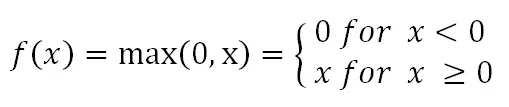


SOFTMAX:
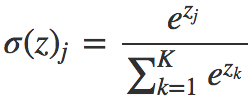

In [7]:
# Función de activación ReLU
def relu(x):
    return max(0, x)

# Función Softmax
def softmax(x):
    exp_values = [math.exp(i - max(x)) for i in x]
    sum_exp_values = sum(exp_values)
    return [i / sum_exp_values for i in exp_values]



Ahora que tenemos las neuronas hacemos ejecutar la red

In [11]:
tasa_aprendizaje = 0.01
epocas = 100
# Entrenamiento de la red neuronal
for epoca in range(epocas):
    error_promedio = 0

    for i in range(len(X_estandarizado)):
        # Propagación hacia adelante
        entrada = X_estandarizado[i]

        # Capa oculta
        salida_oculta = [relu(sum([entrada[j] * pesos_capa_oculta[k][j] for j in range(4)])) for k in range(3)]

        # Capa de salida
        salida_red = softmax([sum([salida_oculta[j] * pesos_capa_salida[k][j] for j in range(3)]) for k in range(3)])

        # Error cuadrático medio
        error = sum([(y_one_hot[i][k] - salida_red[k]) ** 2 for k in range(3)]) / 2
        error_promedio += error

        # Propagación hacia atrás (Backpropagation) - Actualización de pesos
        for k in range(3):
            for j in range(4):
                sumatoria_oculta = sum([(y_one_hot[i][l] - salida_red[l]) * pesos_capa_salida[l][k] for l in range(3)])
                pesos_capa_oculta[k][j] += tasa_aprendizaje * sumatoria_oculta * entrada[j]

        for k in range(3):
            for j in range(3):
                pesos_capa_salida[k][j] += tasa_aprendizaje * (y_one_hot[i][k] - salida_red[k]) * salida_oculta[j]
        #print("YCalculado=",salida_red," Yesperado=",y_one_hot[i])
    # Calcular el error promedio para la época
    error_promedio /= len(X_estandarizado)
    print(f"Epoca {epoca + 1}, Error Promedio: {error_promedio}")

print("\n Ultima predicción: ",salida_red, " Valor esperado: ",y_one_hot[149])
# Imprimir pesos después del entrenamiento
print("\nPesos de la capa oculta después del entrenamiento:")
print(pesos_capa_oculta)

print("\nPesos de la capa de salida después del entrenamiento:")
print(pesos_capa_salida)

Epoca 1, Error Promedio: 0.09010240769840969
Epoca 2, Error Promedio: 0.09007964748883661
Epoca 3, Error Promedio: 0.09005690772668574
Epoca 4, Error Promedio: 0.09003418826355639
Epoca 5, Error Promedio: 0.09001148897718504
Epoca 6, Error Promedio: 0.0899888097703313
Epoca 7, Error Promedio: 0.08996615056970285
Epoca 8, Error Promedio: 0.08994351132491905
Epoca 9, Error Promedio: 0.0899208920075098
Epoca 10, Error Promedio: 0.08989829260994528
Epoca 11, Error Promedio: 0.08987571314853625
Epoca 12, Error Promedio: 0.08985316984731385
Epoca 13, Error Promedio: 0.08983068782565003
Epoca 14, Error Promedio: 0.08980822753459748
Epoca 15, Error Promedio: 0.08978578818687143
Epoca 16, Error Promedio: 0.08976336996363077
Epoca 17, Error Promedio: 0.08974097298835128
Epoca 18, Error Promedio: 0.08971859735662092
Epoca 19, Error Promedio: 0.08969624316352139
Epoca 20, Error Promedio: 0.08967391051527067
Epoca 21, Error Promedio: 0.08965159953340852
Epoca 22, Error Promedio: 0.08962931035570702